In [13]:
N_S = 2
nBins=51

In [1]:
import pickle
import warnings

import os, sys
WORKING_DIR = os.path.dirname(os.path.abspath(''))
sys.path.insert(1, os.path.join(WORKING_DIR,'LensQuEst'))
from tqdm import tqdm,trange

from universe import *
from halo_fit import *
from cmb import *
from flat_map import *
from weight import *
from pn_2d import *
import pickle
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np
#######
IN_DATA_FNAMES = ['/oak/stanford/orgs/kipac/users/delon/LensQuEst/map_sims_800x800_20x20_%d.pkl'%(i) for i in range(1,51)]


pairs = [
#   [0,0], #N0
#   [0,1], #kappa
#   [1,0], #kappa
#   [0,2], #N1
#   [1,1], #N1
#   [2,0], #N1
#    [0,3], #should vanish
#    [1,2], #should vanish
#    [2,1], #should vanish
#    [3,0], #should vanish
#    [0,4], #N2 
#    [1,3], #N2
#    [2,2], #N2
#    [3,1], #N2
#    [4,0], #N2
   [-1, -1], #QE
   [-2, -2], #unlensed
]



warnings.filterwarnings("ignore")
#####

oup_fname = '../data/input/universe_Planck15/camb/CAMB_outputs.pkl'
print(oup_fname)
f = open(oup_fname, 'rb') 
powers,cl,c_lensed,c_lens_response = pickle.load(f)
f.close()

totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

L = np.arange(unlensedCL.shape[0])

unlensedTT = unlensedCL[:,0]/(L*(L+1))*2*np.pi
F = unlensedTT
funlensedTT = interp1d(L, F, kind='linear', bounds_error=False, fill_value=0.)

L = np.arange(cl.shape[0])
PP = cl[:,0]
rawPP = PP*2*np.pi/((L*(L+1))**2)
rawKK = L**4/4 * rawPP

fKK = interp1d(L, rawKK, kind='linear', bounds_error=False, fill_value=0.)

L = np.arange(totCL.shape[0])

lensedTT = totCL[:,0]/(L*(L+1))*2*np.pi
F = lensedTT
flensedTT = interp1d(L, F, kind='linear', bounds_error=False, fill_value=0.)


ftot = lambda l : flensedTT(l) + cmb.fForeground(l) + cmb.fdetectorNoise(l)


L = np.arange(c_lens_response.shape[0])

cTgradT = c_lens_response.T[0]/(L*(L+1))*2*np.pi

fTgradT = interp1d(L, cTgradT, kind='linear', bounds_error=False, fill_value=0.)

# In[3]:



# In[4]:




# In[5]:


print("Map properties")

# number of pixels for the flat map
nX = 800
nY =800

# map dimensions in degrees
sizeX = 20.
sizeY = 20.

# basic map object
baseMap = FlatMap(nX=nX, nY=nY, sizeX=sizeX*np.pi/180., sizeY=sizeY*np.pi/180.)

# multipoles to include in the lensing reconstruction
lMin = 30.; lMax = 3.5e3

# ell bins for power spectra
lRange = (1., 2.*lMax)  # range for power spectra


# In[6]:


print("CMB experiment properties")

# Adjust the lMin and lMax to the assumptions of the analysis
# CMB S3 specs
cmb = StageIVCMB(beam=1.4, noise=7., lMin=lMin, lMaxT=lMax, lMaxP=lMax, atm=False)

# Total power spectrum, for the lens reconstruction
# basiscally gets what we theoretically expect the
# power spectrum will look like
forCtotal = lambda l: ftot(l) 

# reinterpolate: gain factor 10 in speed
L = np.logspace(np.log10(lMin/2.), np.log10(2.*lMax), 1001, 10.)
F = np.array(list(map(forCtotal, L)))
cmb.fCtotal = interp1d(L, F, kind='linear', bounds_error=False, fill_value=0.)


in_data = {}

for fname in tqdm(IN_DATA_FNAMES):
    f = open(fname, 'rb') 
    c_in_data = pickle.load(f) 
    f.close()
    for key in c_in_data:
        if(key not in in_data.keys()):
            in_data[key] = np.array(c_in_data[key])
        else:
            in_data[key] = np.vstack( (in_data[key],np.array(c_in_data[key])) )


for key in in_data:
    print(key, np.shape(in_data[key]))


../data/input/universe_Planck15/camb/CAMB_outputs.pkl
Map properties
CMB experiment properties


100%|██████████| 50/50 [03:31<00:00,  4.24s/it]

cmb0F_1 (500, 800, 401)
kCmbF_1 (500, 800, 401)
lCmbF_1 (500, 800, 401)
fgF_1 (500, 800, 401)
noiseF_1 (500, 800, 401)
totalF_1 (500, 800, 401)
totalF_0 (500, 800, 401)


In [3]:
for key in in_data:
    print(key, np.shape(in_data[key]))

    
pairs = [
    [0,0], #N0
    [0,1], #kappa
    [1,0], #kappa
    [1,1], #N1
    [0,2], #N1
    [2,0], #N1
    [-1, -1], #QE
    [-2, -2], #unlensed
]

data_names = {
    0: 'cmb0F_1',
    1: 'lCmbF_o1_1',
    2: 'lCmbF_o2_1',
    -1: 'lCmbF_1',
    -2: 'totalF_0',
}


ps_data = {}


#RDN0

    
RDN0_data = {}


ds1s = []
s1ds = []
s1s2s= []
s2s1s= []


tmp_idx = 0

cmb0F_1 (500, 800, 401)
kCmbF_1 (500, 800, 401)
lCmbF_1 (500, 800, 401)
fgF_1 (500, 800, 401)
noiseF_1 (500, 800, 401)
totalF_1 (500, 800, 401)
totalF_0 (500, 800, 401)


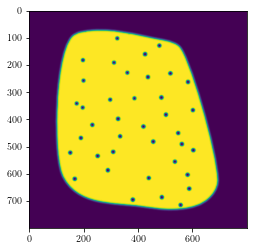

In [5]:
#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
from scipy.ndimage import gaussian_filter 
from scipy.fft import fft2
mask_file = 'mask_simple800x800.png'
psfile = 'point_sources_800x800.png'
psapod = 2

mask = rgb2gray(plt.imread(mask_file))
apodized_mask = gaussian_filter(mask, 3)
point_sources = rgb2gray(plt.imread(psfile))
point_sources = gaussian_filter(point_sources, psapod) 
apodized_mask += point_sources
nPos = np.where(apodized_mask>1)
apodized_mask[nPos] = 1
mask = 1-mask
apodized_mask = 1 - apodized_mask

for a in apodized_mask:
    for b in a:
        assert(b<=1 and b>=0)
        
plt.imshow(apodized_mask)
plt.savefig('figures/apodized_masked_%dx%d.pdf'%(nX, nY),bbox_inches='tight')

In [6]:
d_idx = 0
d = in_data['totalF_1'][d_idx]


#mask stuff
d = baseMap.fourier(baseMap.inverseFourier(d)*apodized_mask)

In [14]:
data = {}



def tmp_combine_Cl(Cls_tot):
    n_runs = np.shape(Cls_tot)[0]
    lCen = Cls_tot[0][0]
    Cls = np.sum(np.transpose(Cls_tot, axes=[1,2,0])[1], axis=1)
#     sCls =  np.sum(np.transpose(Cls_tot, axes=[1,2,0])[2], axis=1)
    sCls = np.sqrt(np.sum(np.square(np.transpose(Cls_tot, axes=[1,2,0])[2]), axis=1))
    return lCen, Cls, sCls
ck = 'RDN(0)'


tot = []
for s_idx in range(N_S):
    print('CURR', s_idx)
    for s2_idx in trange(N_S):
        s1 = in_data['totalF_0'][s_idx]
        s1 = baseMap.fourier(baseMap.inverseFourier(s1)*apodized_mask)
        s2 = in_data['totalF_0'][s2_idx+len(in_data['totalF_0'])//2]
        s2 = baseMap.fourier(baseMap.inverseFourier(s2)*apodized_mask)

        ds1 = baseMap.computeQuadEstKappaNorm(fTgradT, cmb.fCtotal, 
                                             lMin=lMin, lMax=lMax, 
                                             dataFourier=d,
                                             dataFourier2=s1)
        s1d = baseMap.computeQuadEstKappaNorm(fTgradT, cmb.fCtotal, 
                                             lMin=lMin, lMax=lMax, 
                                             dataFourier=s1,
                                             dataFourier2=d)
        s1s2 = baseMap.computeQuadEstKappaNorm(fTgradT, cmb.fCtotal, 
                                             lMin=lMin, lMax=lMax, 
                                             dataFourier=s1,
                                             dataFourier2=s2)
        s2s1 = baseMap.computeQuadEstKappaNorm(fTgradT, cmb.fCtotal, 
                                             lMin=lMin, lMax=lMax, 
                                             dataFourier=s2,
                                             dataFourier2=s1)

#         if(len(ds1s)==0):
#             ds1s = np.array([ds1])
#         else:
#             ds1s = np.vstack((ds1s, np.array([ds1])))

#         if(len(s1ds)==0):
#             s1ds = np.array([s1d])
#         else:
#             s1ds = np.vstack((s1ds, np.array([s1d])))

#         if(len(s1s2s)==0):
#             s1s2s = np.array([s1s2])
#         else:
#             s1s2s = np.vstack((s1s2s, np.array([s1s2])))

#         if(len(s2s1s)==0):
#             s2s1s = np.array([s2s1])
#         else:
#             s2s1s = np.vstack((s2s1s, np.array([s2s1])))
            
            
            
            
        RDN0_data = {
            'ds1' : ds1,
            's1d' : s1d,
            's1s2': s1s2,
            's2s1': s2s1
        }
        
        
        
        curr_data = []

        for s, a, b in [[1, ds1, ds1], [1, ds1, s1d], [1, s1d, ds1], [1, s1d, s1d], [-1, s1s2, s1s2], [-1, s1s2, s2s1]]:
            t0, t1, t2 = baseMap.crossPowerSpectrum(dataFourier1=a, dataFourier2=b, nBins=nBins)
            curr_data.append([t0, s * t1, t2])

        c_ps_data = {}
        c_ps_data[ck] = [0, 0, 0]
        c_ps_data[ck][0], c_ps_data[ck][1], c_ps_data[ck][2] = tmp_combine_Cl(curr_data)

        if(len(tot)==0):
            tot = np.zeros_like(c_ps_data[ck])
            tot[0] = c_ps_data[ck][0]
            
        result = c_ps_data[ck]
        
        assert(all(tot[0] == result[0]))
        tot[1] += result[1]
        tot[2] += np.square(result[2])
        oup_fname = '/scratch/users/delon/LensQuEst/RDN0-MASKED-in_data-%d-%d.pkl'%(d_idx,tmp_idx)
        print(oup_fname)
        f = open(oup_fname, 'wb') 
        pickle.dump(RDN0_data, f)
        f.close()
        tmp_idx += 1
        
        del ds1
        del s1d
        del s1s2
        del s2s1
        

tot[1] = tot[1] / (N_S**2)
tot[2] = np.sqrt(tot[2])/ (N_S**2)


CURR 0


 50%|█████     | 1/2 [00:35<00:35, 35.72s/it]

/scratch/users/delon/LensQuEst/RDN0-MASKED-in_data-0-4.pkl
/scratch/users/delon/LensQuEst/RDN0-MASKED-in_data-0-5.pkl


100%|██████████| 2/2 [01:13<00:00, 36.95s/it]


CURR 1


  0%|          | 0/2 [00:00<?, ?it/s]

/scratch/users/delon/LensQuEst/RDN0-MASKED-in_data-0-6.pkl


100%|██████████| 2/2 [01:11<00:00, 35.82s/it]

/scratch/users/delon/LensQuEst/RDN0-MASKED-in_data-0-7.pkl


In [15]:
print(tot.shape)

(3, 50)


In [29]:
with open('/oak/stanford/orgs/kipac/users/delon/LensQuEst/RDN0-MASKED-combined-%d-nBins%d.pkl'%(d_idx, nBins), "wb") as f:
    pickle.dump(tot, f)


In [17]:
print("Gets a theoretical prediction for the noise")
fNqCmb_fft = baseMap.forecastN0Kappa(fTgradT, cmb.fCtotal, lMin=lMin, lMax=lMax, test=False)
Ntheory = lambda l: fNqCmb_fft(l) 

Gets a theoretical prediction for the noise
computing the reconstruction noise


In [27]:
fsky = np.sum(apodized_mask) / np.sum(np.ones_like(apodized_mask))

(1.1e-10, 0.0009)

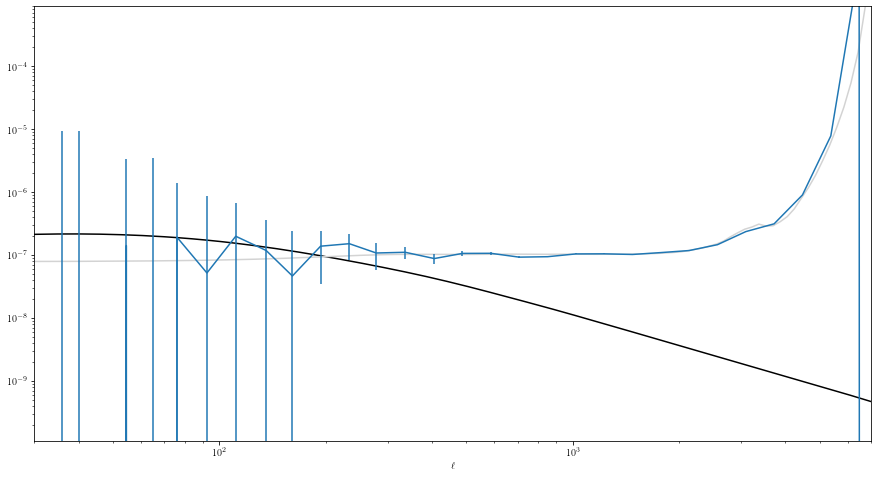

In [28]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
ell = baseMap.l.flatten()
theory=[fKK, Ntheory]
theory_l=[r'$\big<\kappa\kappa\big>$', r'$N_{\rm theory}$']
theory_s=['black', 'lightgrey']
factor = lambda L:1
for f,l,sty in zip(theory, theory_l, theory_s):
    L = np.logspace(np.log10(1.), np.log10(np.max(ell)), 201, 10.)
    ClExpected = np.array(list(map(f, L)))
    ax.plot(L, factor(L)*ClExpected, sty, label=l)
plt.errorbar(tot[0], tot[1]/fsky,yerr=tot[2])
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_yscale('log')
ax.set_xlim(lMin,2*lMax)
ax.set_ylim(1.1e-10,.9e-3)